In [130]:
import pandas as pd

In [131]:
import seaborn as sn

In [132]:
import matplotlib.pyplot as pl

In [133]:
import numpy as np

In [134]:
import warnings

In [135]:
warnings.filterwarnings('ignore')

In [136]:
book=pd.read_csv(r'C:\Users\deyar\OneDrive\Desktop\BookRecommendationSystem\notebooks\data\Books.csv')
user=pd.read_csv(r'C:\Users\deyar\OneDrive\Desktop\BookRecommendationSystem\notebooks\data\Users.csv')
rating=pd.read_csv(r'C:\Users\deyar\OneDrive\Desktop\BookRecommendationSystem\notebooks\data\Ratings.csv')

In [137]:
book.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [138]:
book.shape

(271360, 8)

In [139]:
user.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [140]:
user.shape

(278858, 3)

In [141]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [142]:
rating.shape

(1149780, 3)

In [143]:
book_and_rating=book.merge(rating,on='ISBN')

In [144]:
book_rating_user=book_and_rating.merge(user,on='User-ID')

In [145]:
book_rating_user.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN


In [146]:
book_rating_user.shape

(1031136, 12)

In [147]:
book_rating_user.duplicated().sum()

0

In [148]:
book_rating_user.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 2
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Book-Rating                 0
Location                    0
Age                    277835
dtype: int64

there is huge null value in age columns so use dataset is not important here

In [149]:
book_and_rating.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
User-ID                0
Book-Rating            0
dtype: int64

In [150]:
book_and_rating.dropna(inplace=True)

In [151]:
book_and_rating.duplicated().sum()

0

In [152]:
book_and_rating.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [153]:
count=book_and_rating.groupby('Book-Title')['Book-Rating'].count().reset_index()
count=count.rename(columns={'Book-Rating':'rating_count'})
count.head(2)

,Book-Title,rating_count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1


In [154]:
avg=book_and_rating.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg=avg.rename(columns={'Book-Rating':'rating_avg'})
avg.head()

,Book-Title,rating_avg
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [155]:
count_avg=count.merge(avg,on='Book-Title')
count_avg.head()

,Book-Title,rating_count,rating_avg
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [156]:
popular_avg_book=count_avg.sort_values(by='rating_avg',ascending=False).head(50)

In [157]:
popular_book=count_avg[count_avg['rating_count']>250]

In [158]:
popular_book=popular_book.sort_values(by='rating_count',ascending=False).head(50)

In [159]:
popular_book.head(1)

,Book-Title,rating_count,rating_avg
234945,Wild Animus,2502,1.019584


In [160]:
popular_avg_book=popular_book.sort_values(by='rating_avg',ascending=False).head(10)

In [161]:
popular_avg_book.head(2)

,Book-Title,rating_count,rating_avg
80411,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
80442,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652


In [162]:
data=count_avg.merge(book,on='Book-Title')

In [163]:
popular_book50=popular_book.merge(book,on='Book-Title')

In [164]:

final50=popular_book50.drop_duplicates('Book-Title')

In [165]:
final50.head(2)

,Book-Title,rating_count,rating_avg,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Wild Animus,2502,1.019584,0971880107,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,The Lovely Bones: A Novel,1295,4.468726,0316666343,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...


In [166]:
top10=final50.head(10)

In [167]:
book_and_rating.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5


In [168]:
year_basis=book_and_rating.groupby('Year-Of-Publication')['Book-Title'].count().reset_index()

In [169]:
year_basis.rename(columns={"Book-Title":"no_of_book"},inplace=True)

In [170]:
year_basis=year_basis.sort_values(by='no_of_book',ascending=False).head(10)

In [171]:
publisher_basis=book_and_rating.groupby('Publisher')['Book-Title'].count().reset_index()
publisher_basis.rename(columns={"Book-Title":"no_of_book_publish"},inplace=True)

In [172]:
publisher_basis=publisher_basis.sort_values(by='no_of_book_publish',ascending=False).head(10)

In [173]:
publisher_basis.head(2)

,Publisher,no_of_book_publish
1388,Ballantine Books,34724
11709,Pocket,31989


In [174]:
non_zero_rating=book_and_rating[book_and_rating['Book-Rating']!=0]

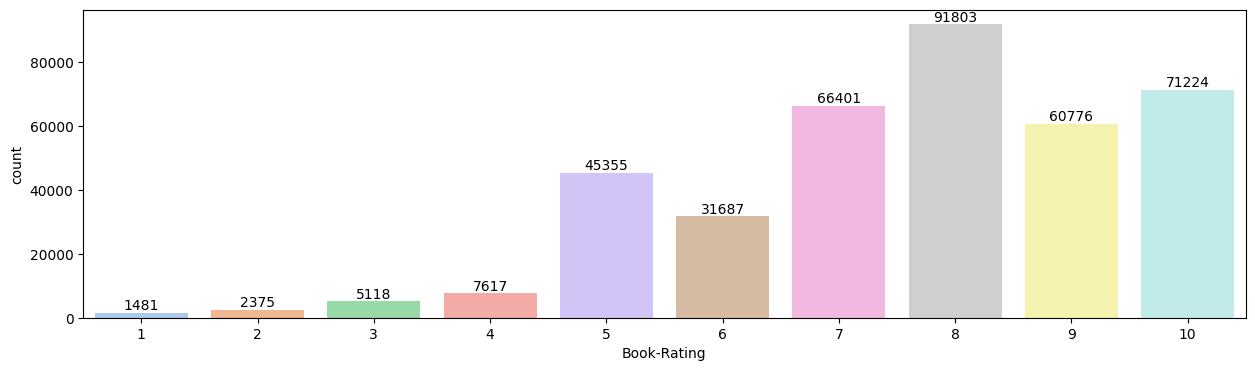

In [175]:
pl.figure(figsize=(15,4))
a=sn.countplot(data=non_zero_rating,x="Book-Rating",palette='pastel')
for i in a.containers:
  a.bar_label(i)
pl.show()

most users gave 8 rating

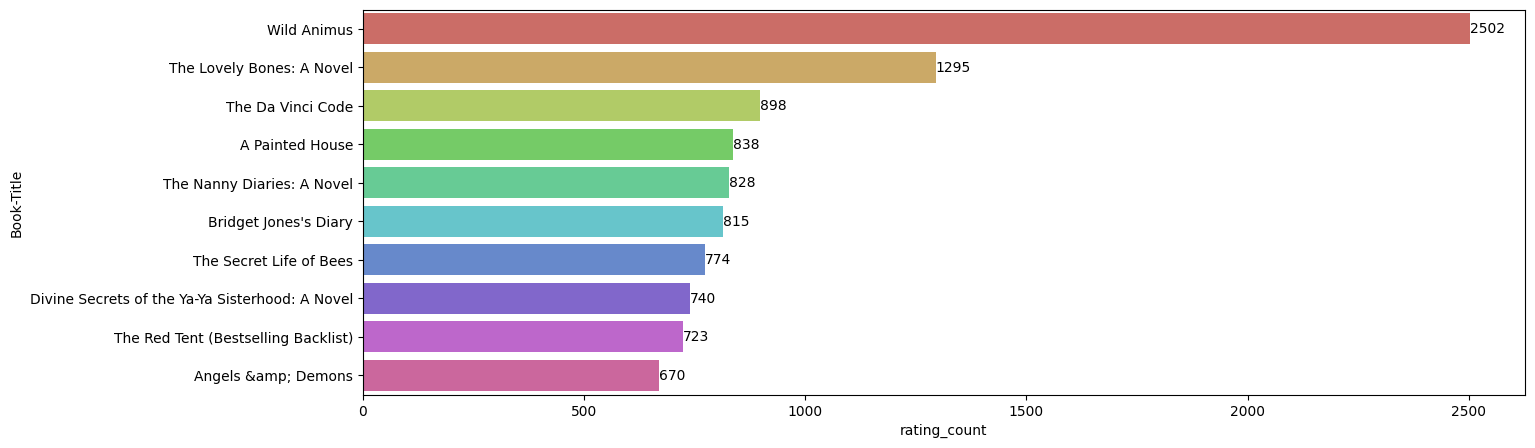

In [176]:
pl.figure(figsize=(15,5))
a=sn.barplot(data=top10,y="Book-Title",x='rating_count',palette='hls')
for i in a.containers:
  a.bar_label(i)
pl.show()

top 10 popular books

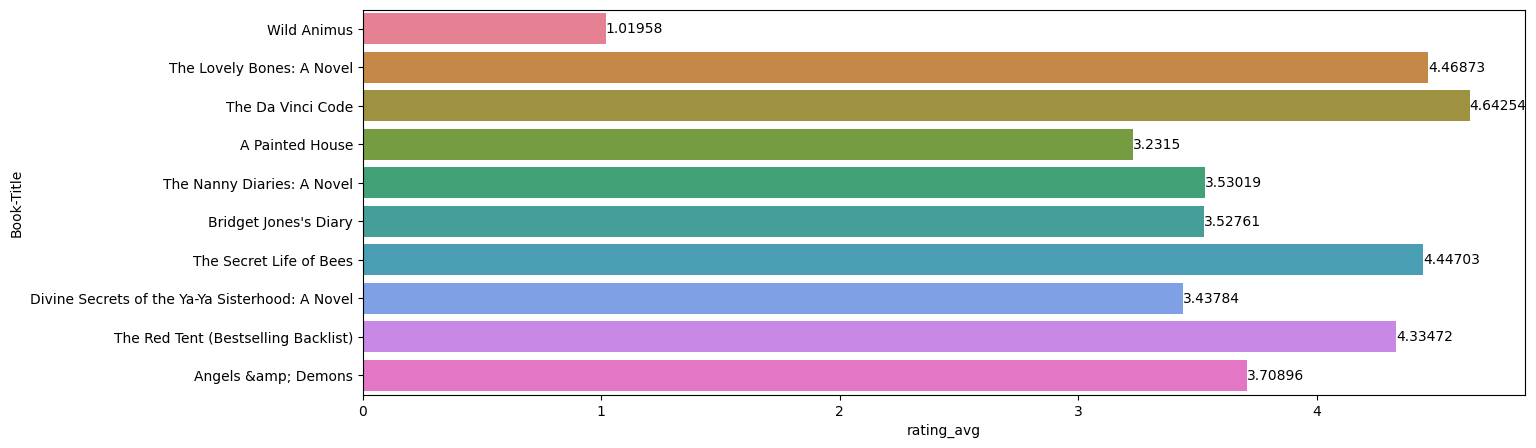

In [177]:
pl.figure(figsize=(15,5))
a=sn.barplot(data=top10,y="Book-Title",x='rating_avg',palette='husl')
for i in a.containers:
  a.bar_label(i)
pl.show()

top 10 popular book's avg rating

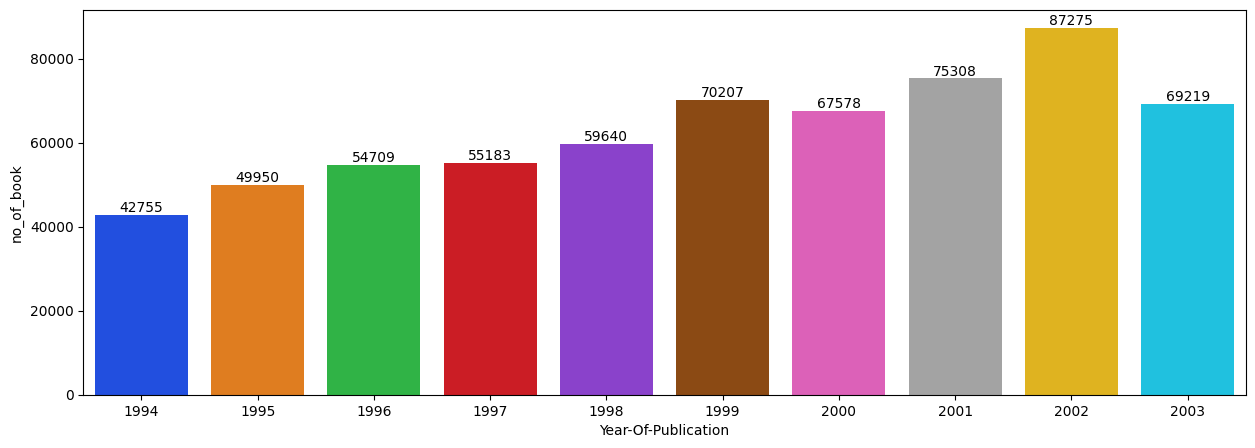

In [178]:
pl.figure(figsize=(15,5))
a=sn.barplot(data=year_basis,x="Year-Of-Publication",y='no_of_book',palette='bright')
for i in a.containers:
  a.bar_label(i)
pl.show()

no of book published W.T.R of year, in 2002 max book has been published.

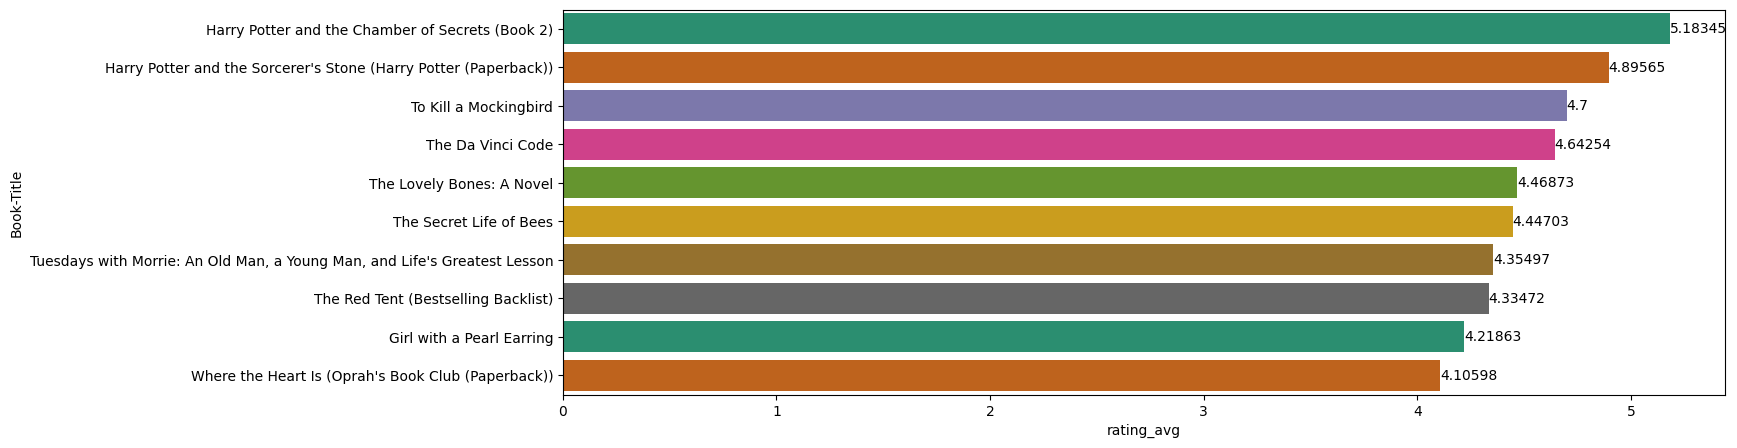

In [179]:
pl.figure(figsize=(15,5))
a=sn.barplot(data=popular_avg_book,y="Book-Title",x='rating_avg',palette='Dark2')
for i in a.containers:
  a.bar_label(i)
pl.show()

top 10 highly (avg)rated book among top 50 popular book

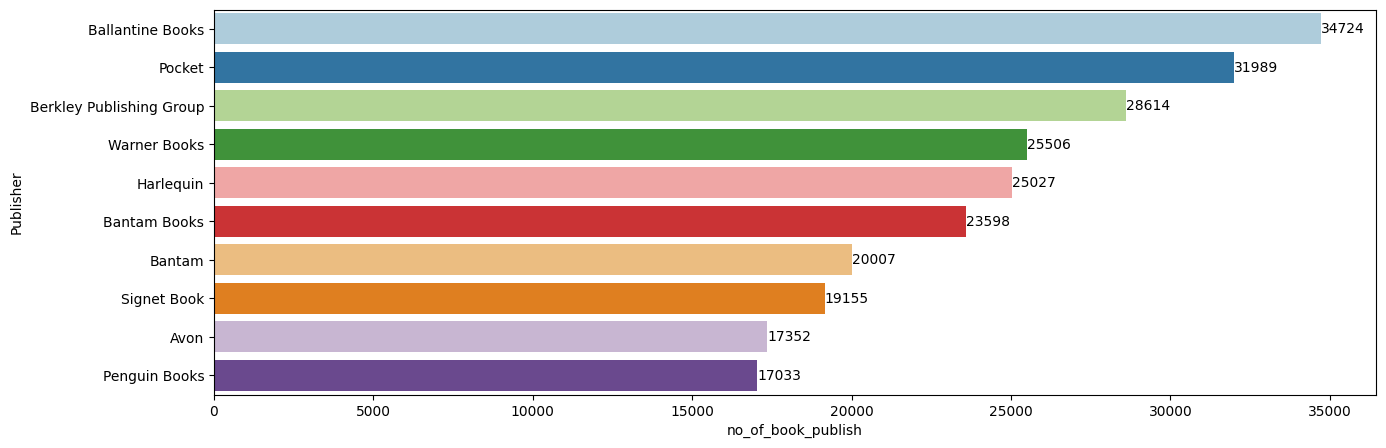

In [180]:
pl.figure(figsize=(15,5))
a=sn.barplot(data=publisher_basis,y="Publisher",x='no_of_book_publish',palette='Paired')
for i in a.containers:
  a.bar_label(i)
pl.show()

top 10 publisher